### 6.2 標本平均の分布【経験的確率デモ（試行回数と結果のバラツキ）】
+ 確率の定義
+ 一様分布（離散的確率変数）
+ 大数の法則（p.84 6.2.2、p.87 6.4.2 と関連）

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
import pandas as pd
import pprint

In [2]:
# 試行（サイコロ振り）回数を指定
# この数値を様々に変えて、結果がどう変わるか調べてみよ。
trial_num = 100

Result = randint(1,7,trial_num).tolist()

# サイコロの出た目（試行結果）の表示
pprint.pprint(Result, compact=True)

[2, 4, 1, 3, 5, 6, 1, 1, 3, 2, 5, 6, 2, 1, 1, 5, 4, 1, 4, 1, 2, 4, 1, 4, 6, 4,
 2, 3, 2, 2, 4, 5, 3, 5, 1, 2, 1, 5, 4, 4, 2, 5, 4, 3, 1, 1, 5, 6, 4, 6, 5, 1,
 5, 2, 4, 6, 1, 5, 4, 5, 2, 5, 3, 4, 4, 3, 1, 3, 2, 4, 6, 3, 1, 4, 2, 4, 4, 3,
 6, 5, 1, 1, 5, 5, 3, 3, 6, 5, 2, 6, 3, 1, 2, 4, 5, 1, 3, 6, 1, 5]


In [3]:
# 3の目が出た回数をカウント
Result.count(3)

14

In [4]:
# 3の目が出た確率を計算
#（参考値）数学的確率（全ての目の出現が同様に確からしい場合）
print("参考：1/6 =", 1/6)

Result.count(3)/len(Result)

参考：1/6 = 0.16666666666666666


0.14

In [5]:
# 全ての目の一括計算
for k in [1,2,3,4,5,6]:
    print(k,': ', Result.count(k), '回  prob.: ', Result.count(k)/len(Result))

1 :  21 回  prob.:  0.21
2 :  15 回  prob.:  0.15
3 :  14 回  prob.:  0.14
4 :  20 回  prob.:  0.2
5 :  19 回  prob.:  0.19
6 :  11 回  prob.:  0.11


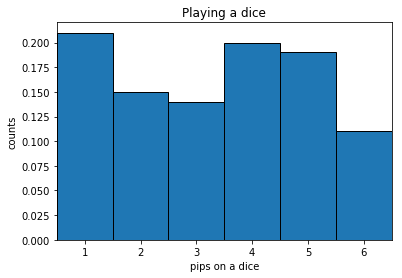

In [6]:
# ヒストグラムを出力
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

bins = np.arange(1,8)   # plt.hist, np.arange の仕様で最大値+2とする
plt.hist(Result, bins=bins, ec='k',density=True)  # ecはedge color,densityは全体を1に規格化
plt.title("Playing a dice")
plt.xlabel("pips on a dice")
plt.ylabel("counts")
bins_labels(bins)

### 標本抽出を多数回繰り返し場合の標本平均と標本分散の振る舞い

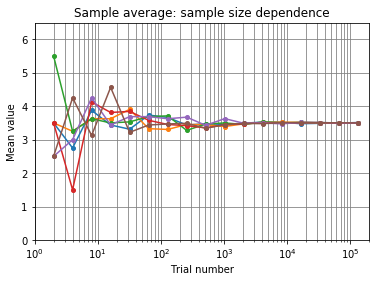

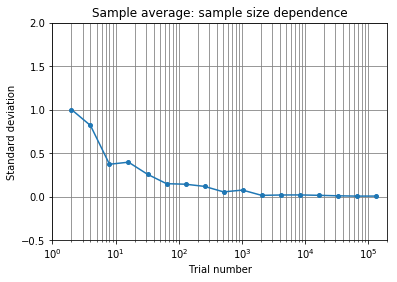

In [7]:
# 下の試行をnum_repeat回独立に実行し、結果のラインをnum_repeat本描画して
# 一般的傾向を捉える
num_repeat = 6
ave_table = []

# playnum回サイコロを振って（=1標本）、一組の標本平均と標本分散を返す関数
def dice_AveVar_calc(playnum):
    play = np.random.randint(1, 7, playnum)
    return np.mean(play), np.var(play, ddof=0)

# 標本サイズ（サイコロを振る回数: playnumのリスト）の設定
di = [2**x for x in range(1, 18)]

for num_trials in range(num_repeat):
    dice_ave_for_trialnum = []

    for p in di:
        ave, var = dice_AveVar_calc(p)
        dice_ave_for_trialnum.append(ave)

    ave_table.append(dice_ave_for_trialnum)
    plt.plot(di, dice_ave_for_trialnum, marker="o", markersize=4)

hoge = np.array(ave_table).reshape(num_repeat, len(di))
stds = np.sqrt(np.var(hoge, axis=0))

plt.xscale('log')
plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')
plt.axis([1,2e5,0,6.5])  #[Xmin, Xmax, Ymin, Ymax]
plt.title("Sample average: sample size dependence")
plt.xlabel("Trial number")
plt.ylabel("Mean value")
plt.show()

plt.plot(di, stds, marker="o", markersize=4)
plt.xscale('log')
plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')
plt.axis([1,2e5,-.5,2])  #[Xmin, Xmax, Ymin, Ymax]
plt.title("Sample average: sample size dependence")
plt.xlabel("Trial number")
plt.ylabel("Standard deviation");

In [8]:
pd.DataFrame(hoge)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.5,2.75,3.875,3.4375,3.31250,3.734375,3.664062,3.437500,3.474609,3.456055,3.491699,3.524658,3.521851,3.476624,3.487823,3.493759,3.512039
1,3.5,3.25,3.625,3.6250,3.90625,3.328125,3.304688,3.453125,3.449219,3.392578,3.471680,3.517090,3.524048,3.516174,3.499268,3.504486,3.498093
2,5.5,3.25,3.625,3.5000,3.53125,3.687500,3.710938,3.277344,3.466797,3.499023,3.453125,3.529297,3.502563,3.513916,3.509552,3.498184,3.498680
3,3.5,1.50,4.125,3.8125,3.84375,3.578125,3.453125,3.417969,3.351562,3.446289,3.472656,3.509766,3.486206,3.507141,3.509155,3.492264,3.498772
4,2.5,3.00,4.250,3.4375,3.68750,3.687500,3.625000,3.671875,3.427734,3.627930,3.490234,3.498779,3.472412,3.515015,3.511963,3.498886,3.498116
5,2.5,4.25,3.125,4.5625,3.21875,3.437500,3.468750,3.488281,3.341797,3.444336,3.484863,3.478027,3.504395,3.511536,3.505524,3.504288,3.499367
